In [1]:
import tifffile
import numpy as np

In [17]:
imgs = np.load("/Users/dibrov/Documents/PhD/gans/coleman4alex/imgs.npy")
data = np.load("/Users/dibrov/Documents/PhD/gans/coleman4alex/data.npy")

In [3]:
imgs.shape

(100, 10, 7, 100, 100)

In [4]:
data.shape

(100, 10, 4)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

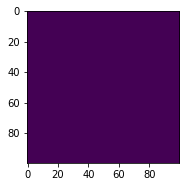

In [9]:
plt.subplot(121)
plt.imshow(imgs[0,2,4]),

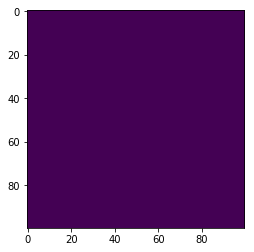

In [10]:
plt.imshow(imgs[0,2,4])

In [11]:
imgs

array([[[[[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         ...,

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1.

In [13]:
data.shape

(100, 10, 4)

In [14]:
import tifffile
import os

dirName = "/Users/dibrov/ownCloud/predGT/"
q = tifffile.imread(dirName + "predGT_0.tif")
# for f in os.lisdir():


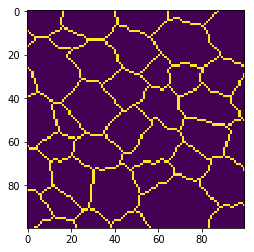

In [16]:
plt.imshow(q)

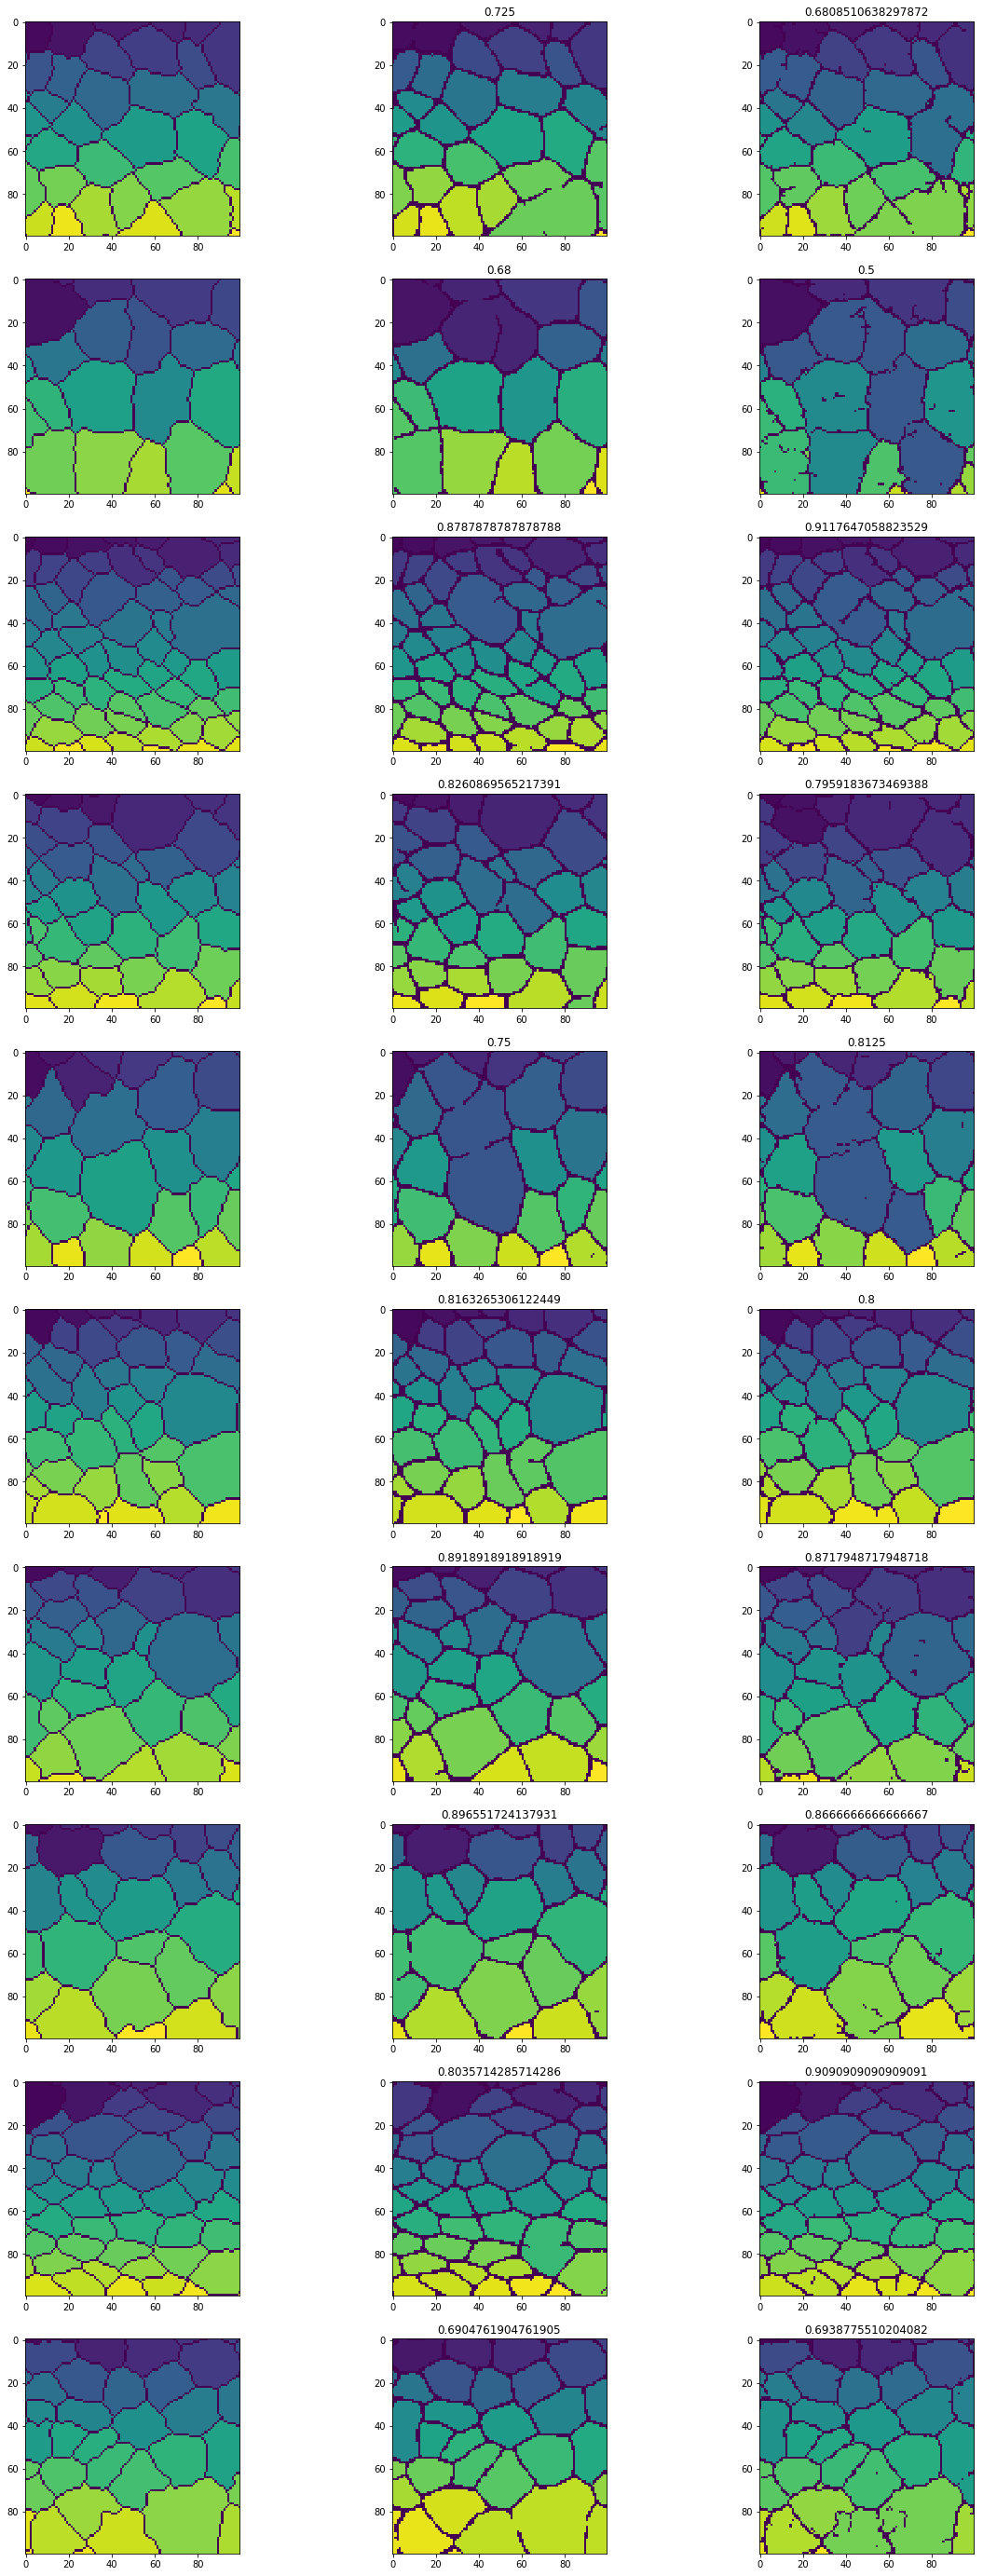

In [34]:
from scipy.ndimage import label
import tifffile
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,50

dirName = "/Users/dibrov/ownCloud/"
gtName = "predGT"
synthName = "predSynth"
rawName = "predRaw"

th = 0.15

numImgs = 10
start = 10
for i in range(start,start+numImgs,1):
    gt = tifffile.imread(dirName+gtName+"/"+gtName+"_"+str(i)+".tif")
    synth = tifffile.imread(dirName+synthName+"/"+synthName+"_"+str(i)+".tif")
    raw = tifffile.imread(dirName+rawName+"/"+rawName+"_"+str(i)+".tif")
    plt.subplot(numImgs,3,(i-start)*3+1)
    plt.imshow(label(gt<th)[0])
    plt.subplot(numImgs,3,3*(i-start)+2)
    plt.title(data[i,2,0])
    plt.imshow(label(synth<th)[0])
    plt.subplot(numImgs,3,3*(i-start)+3)
    plt.title(data[i,2,1])
    plt.imshow(label(raw<th)[0])

In [25]:
qq = label(1-q)

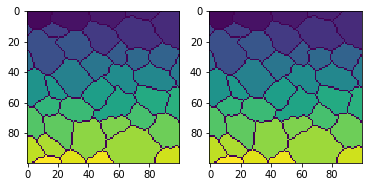

In [27]:
plt.subplot(121)
plt.imshow(qq[0])
plt.subplot(122)
plt.imshow(qq[0])

In [21]:
data.shape

(100, 10, 4)

In [28]:
np.arange(10)/20 + 0.05

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [19]:
data, imgs = runalex()


In [9]:
from segtools.segtools import color

In [11]:
color.recolor_from_mapping??

In [64]:
import sys
sys.path.append("/Users/dibrov/Documents/PhD/software/")
from segtools.segtools import scores_dense
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
import tifffile
%matplotlib inline

def filterlab(lab):
    nhl = nhl_tools.hyp2nhl(lab)
    toosmall = {n['label']:0 for n in nhl if n['area']<10}
    return toosmall

def runalex():
  times = range(100)
  data = np.ones((100,10,4))
  imgs = np.ones((100,10,7,100,100))
  for t in times:
    for i,th in enumerate(np.arange(10)/20 + 0.05):
      img = tifffile.imread('/Users/dibrov/ownCloud/predGT/predGT_{:d}.tif'.format(t))
      pimg1 = tifffile.imread('/Users/dibrov/ownCloud/predSynth3/predSynth3_{:d}.tif'.format(t))
      pimg2 = tifffile.imread('/Users/dibrov/ownCloud/predRaw/predRaw_{:d}.tif'.format(t))
      raw = tifffile.imread('/Users/dibrov/ownCloud/raw/raw_{:d}.tif'.format(t))
      lab_gt = label(1-img)[0]
      lab1  = label(pimg1 < th)[0]
      lab2  = label(pimg2 < th)[0]
      smalllabels = filterlab(lab1)
      if len(smalllabels) > 0:
        lab1 = color.recolor_from_mapping_scalar(lab1, smalllabels).astype(np.int)
      smalllabels = filterlab(lab2)
      if len(smalllabels) > 0:
        lab2 = color.recolor_from_mapping_scalar(lab2, smalllabels).astype(np.int)
    
      # imsave('lab1/lab_synth_{:d}.tif'.format(t), lab1)
      # imsave('lab2/lab_raw_{:d}.tif'.format(t), lab2)
      pr1 = scores_dense.precision(lab_gt,lab1)
      pr2 = scores_dense.precision(lab_gt,lab2)
      sg1 = scores_dense.seg(lab_gt,lab1)
      sg2 = scores_dense.seg(lab_gt,lab2)
      imgs[t,i] = [raw,img,pimg1,pimg2,lab_gt,lab1,lab2]
      data[t,i] = [pr1,pr2,sg1,sg2]
  return data,imgs


In [65]:
data,imgs = runalex()

/Users/dibrov/Documents/PhD/software/segtools/segtools/scores_dense.py:43: RuntimeWarning: invalid value encountered in true_divide
  m1 = np.where(tmp==0,0,psg / tmp)


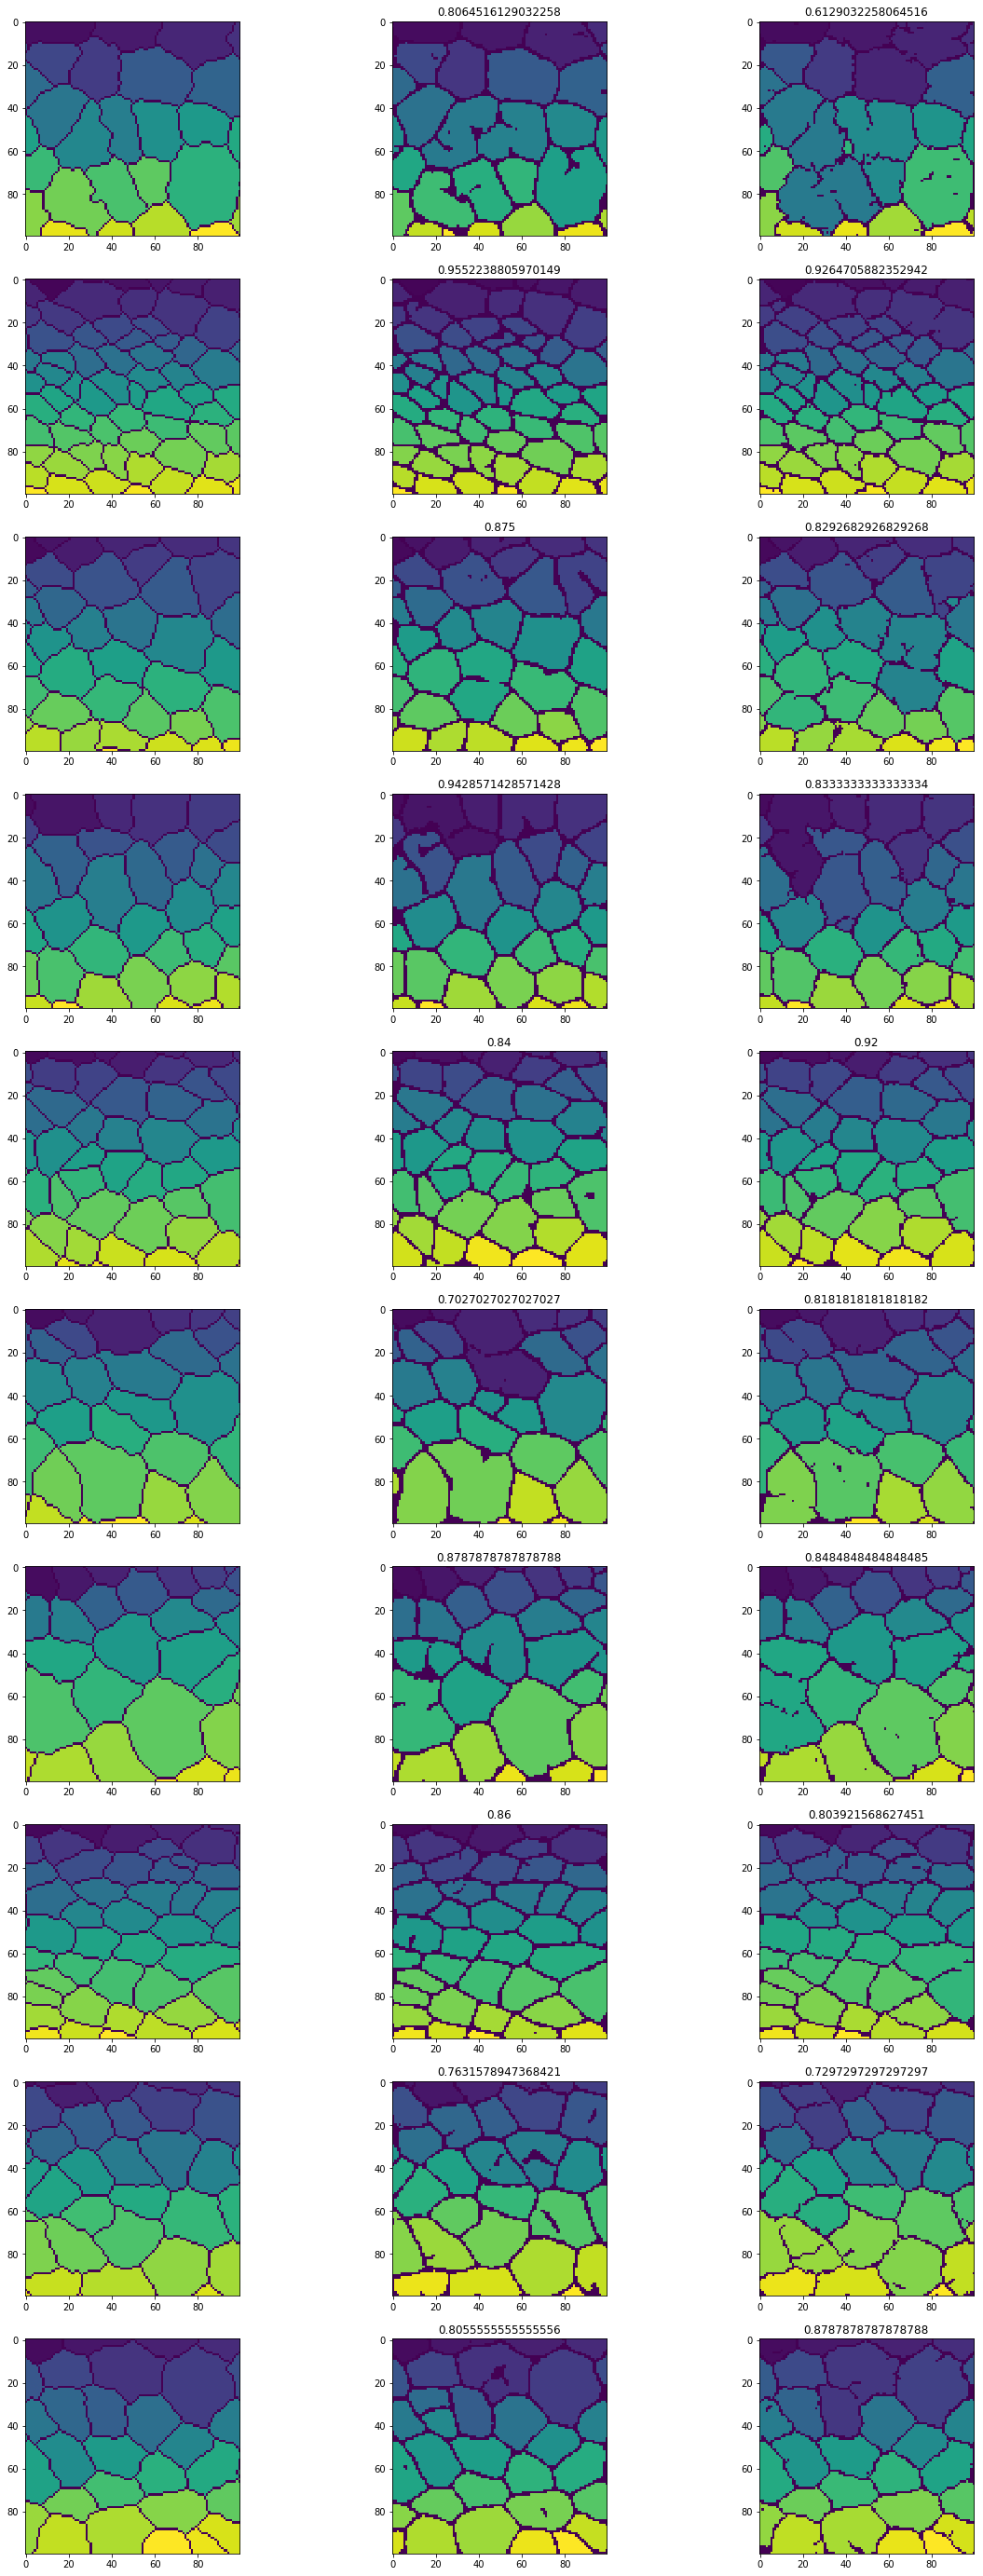

In [68]:
from scipy.ndimage import label
import tifffile
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,50

dirName = "/Users/dibrov/ownCloud/"
gtName = "predGT"
synthName = "predSynth"
rawName = "predRaw"

th = 0.15

numImgs = 10
start = 20
for i in range(start,start+numImgs,1):
    gt = imgs[i,2,1]
    synth = imgs[i,2,2]
    raw = imgs[i,2,3]
    plt.subplot(numImgs,3,(i-start)*3+1)
#     plt.imshow(label(gt<th)[0])
    plt.imshow(imgs[i,2,4])
    
    plt.subplot(numImgs,3,3*(i-start)+2)
    plt.title(data[i,2,0])
#     plt.imshow(label(synth<th)[0])
    plt.imshow(imgs[i,2,5])
    
    plt.subplot(numImgs,3,3*(i-start)+3)
    plt.title(data[i,2,1])
#     plt.imshow(label(raw<th)[0])
    plt.imshow(imgs[i,2,6])

In [20]:
np.mean(data[:,2,0]),np.mean(data[:,2,1])

(0.36908181631343256, 0.0517451601657028)

In [67]:
np.mean(data[:,2,0]),np.mean(data[:,2,1])

(0.8728402894538486, 0.8629052278824202)

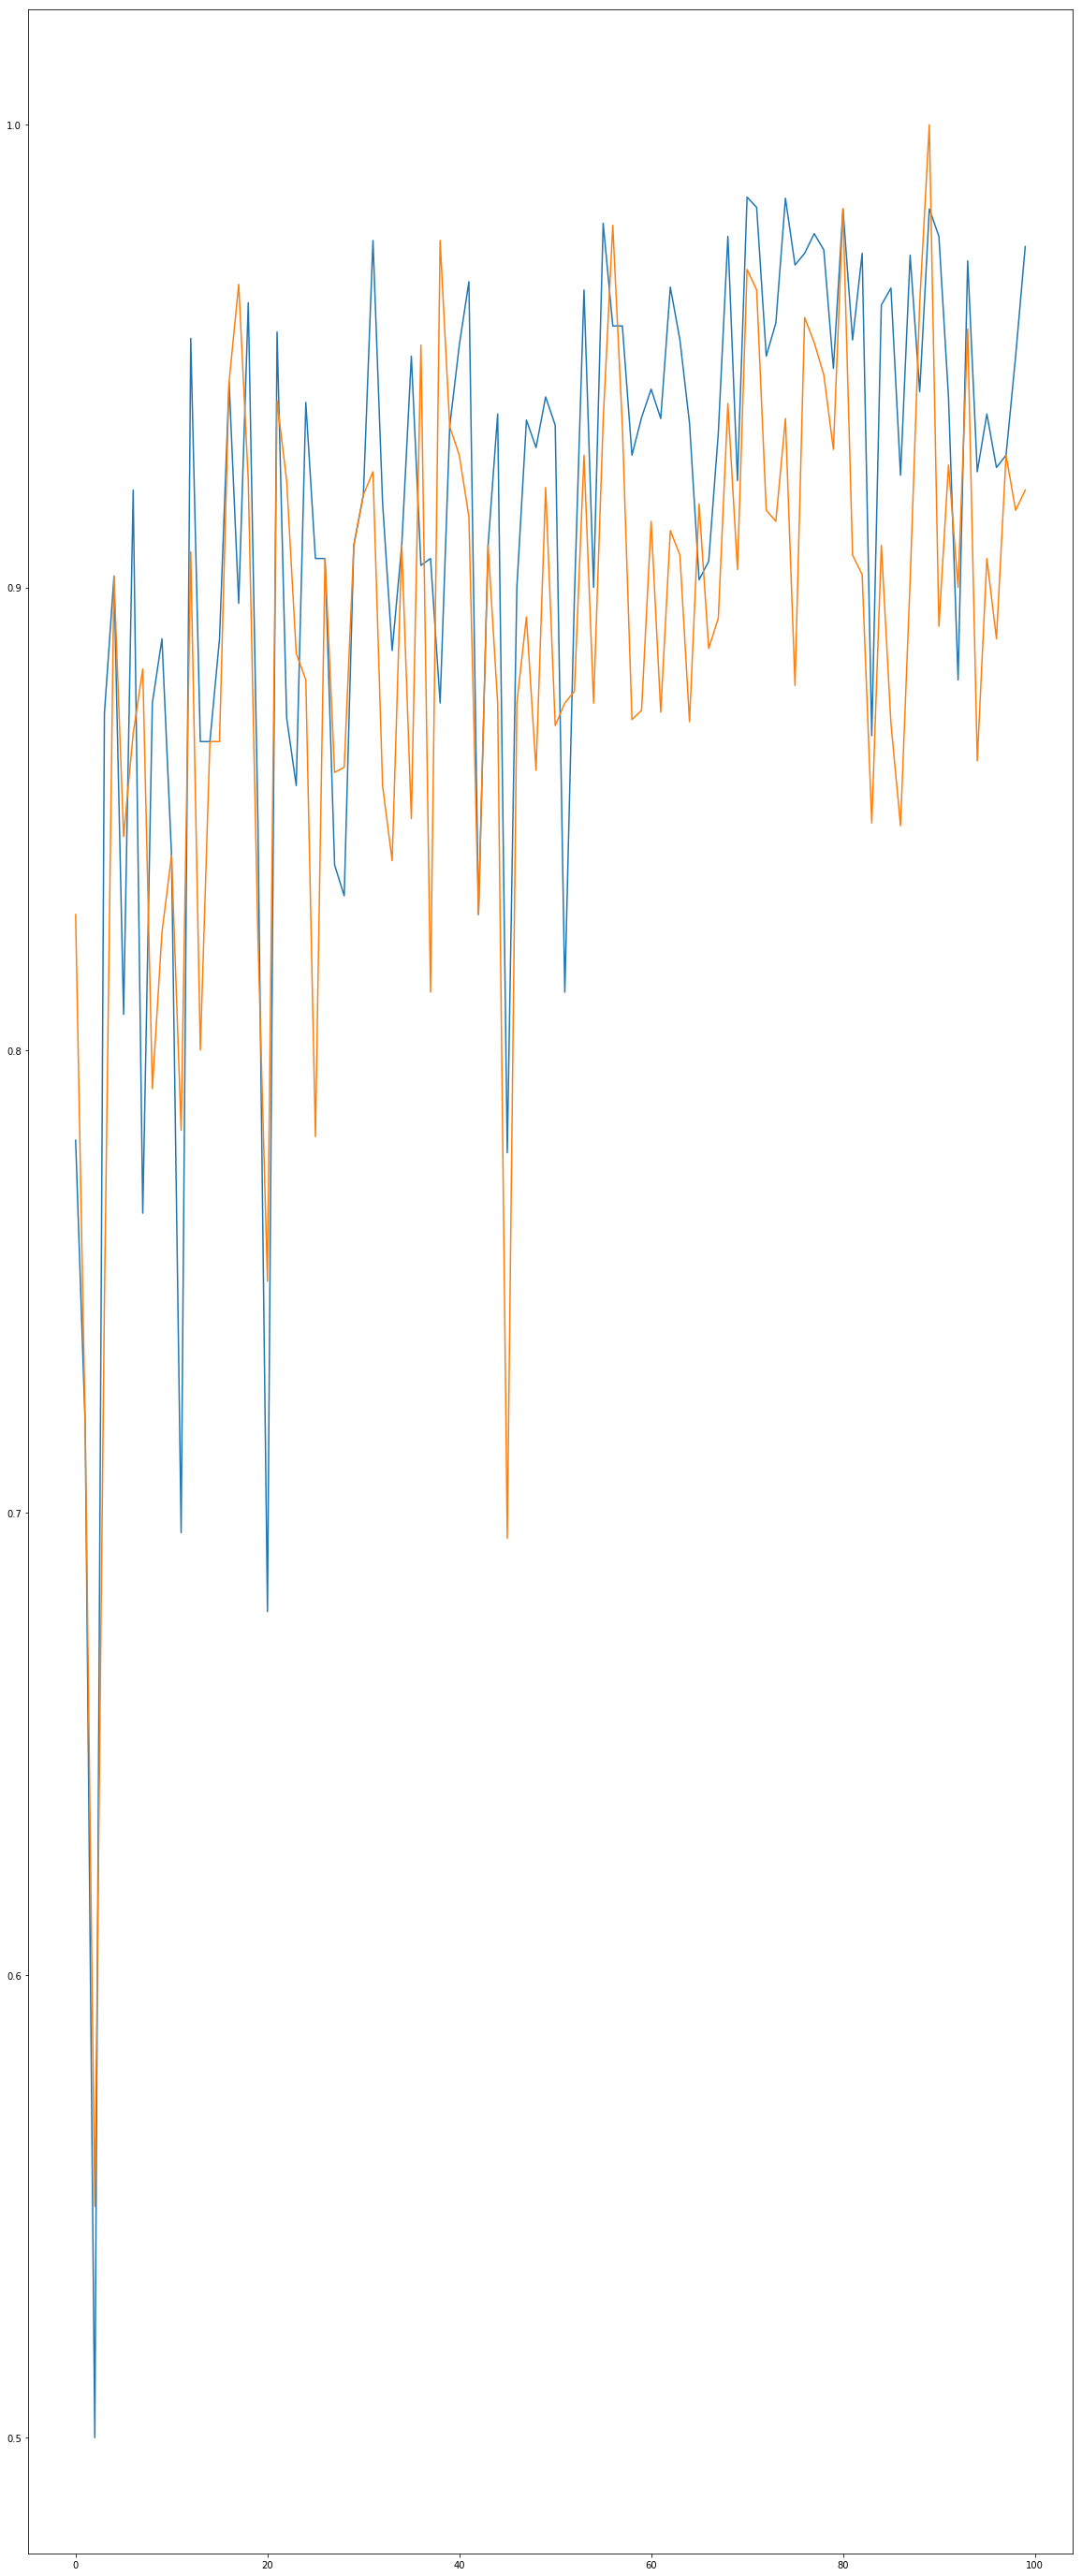

In [26]:
plt.plot(data[:,2,1])
plt.plot(data[:,2,0])

In [10]:
data.shape

(100, 10, 4)

In [4]:
from segtools.segtools import nhl_tools

In [5]:
def filterlab(lab):
    nhl = nhl_tools.hyp2nhl(lab)
    toosmall = [n['label'] for n in nhl if n['area']<3]
    return toosmall


    

In [6]:
lab

NameError: name 'lab' is not defined